### Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

### Exploratory Data Analysis, Data Cleaning and Data Preprocessing

In [2]:
data = pd.read_csv("bank-additional.csv",sep = ';')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [5]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [6]:
data.shape

(4119, 21)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [8]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [9]:
# Numeric features
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
print("Numeric features:")
print(numeric_features)

Numeric features:
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [10]:
# Categorical features
categorical_features = data.select_dtypes(include=['object']).columns
print("\nCategorical features:")
print(categorical_features)


Categorical features:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4119.0,40.113620,10.313362,18.000,32.000,38.000,47.000,88.000
duration,4119.0,256.788055,254.703736,0.000,103.000,181.000,317.000,3643.000
campaign,4119.0,2.537266,2.568159,1.000,1.000,2.000,3.000,35.000
pdays,4119.0,960.422190,191.922786,0.000,999.000,999.000,999.000,999.000
previous,4119.0,0.190337,0.541788,0.000,0.000,0.000,0.000,6.000
emp.var.rate,4119.0,0.084972,1.563114,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,4119.0,93.579704,0.579349,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,4119.0,-40.499102,4.594578,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,4119.0,3.621356,1.733591,0.635,1.334,4.857,4.961,5.045
nr.employed,4119.0,5166.481695,73.667904,4963.600,5099.100,5191.000,5228.100,5228.100


In [12]:
data.isnull().T

,0,1,2,3,4,5,6,7,8,9,...,4109,4110,4111,4112,4113,4114,4115,4116,4117,4118
age,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
job,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
marital,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
education,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
default,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
housing,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
loan,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
contact,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
month,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
day_of_week,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
data.isnull().values.any()

False

In [14]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There is no missing values.

In [15]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4114    False
4115    False
4116    False
4117    False
4118    False
Length: 4119, dtype: bool

In [16]:
plt.style.use("fivethirtyeight")

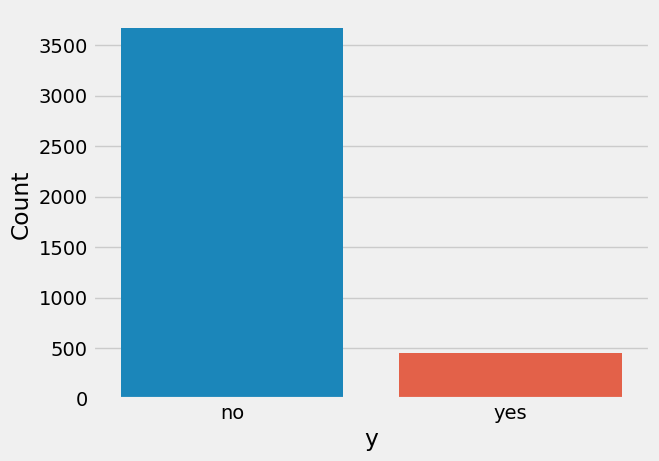

In [17]:
sns.countplot(data=data, x='y', hue='y')
plt.xlabel('y')
plt.ylabel('Count')
plt.show()

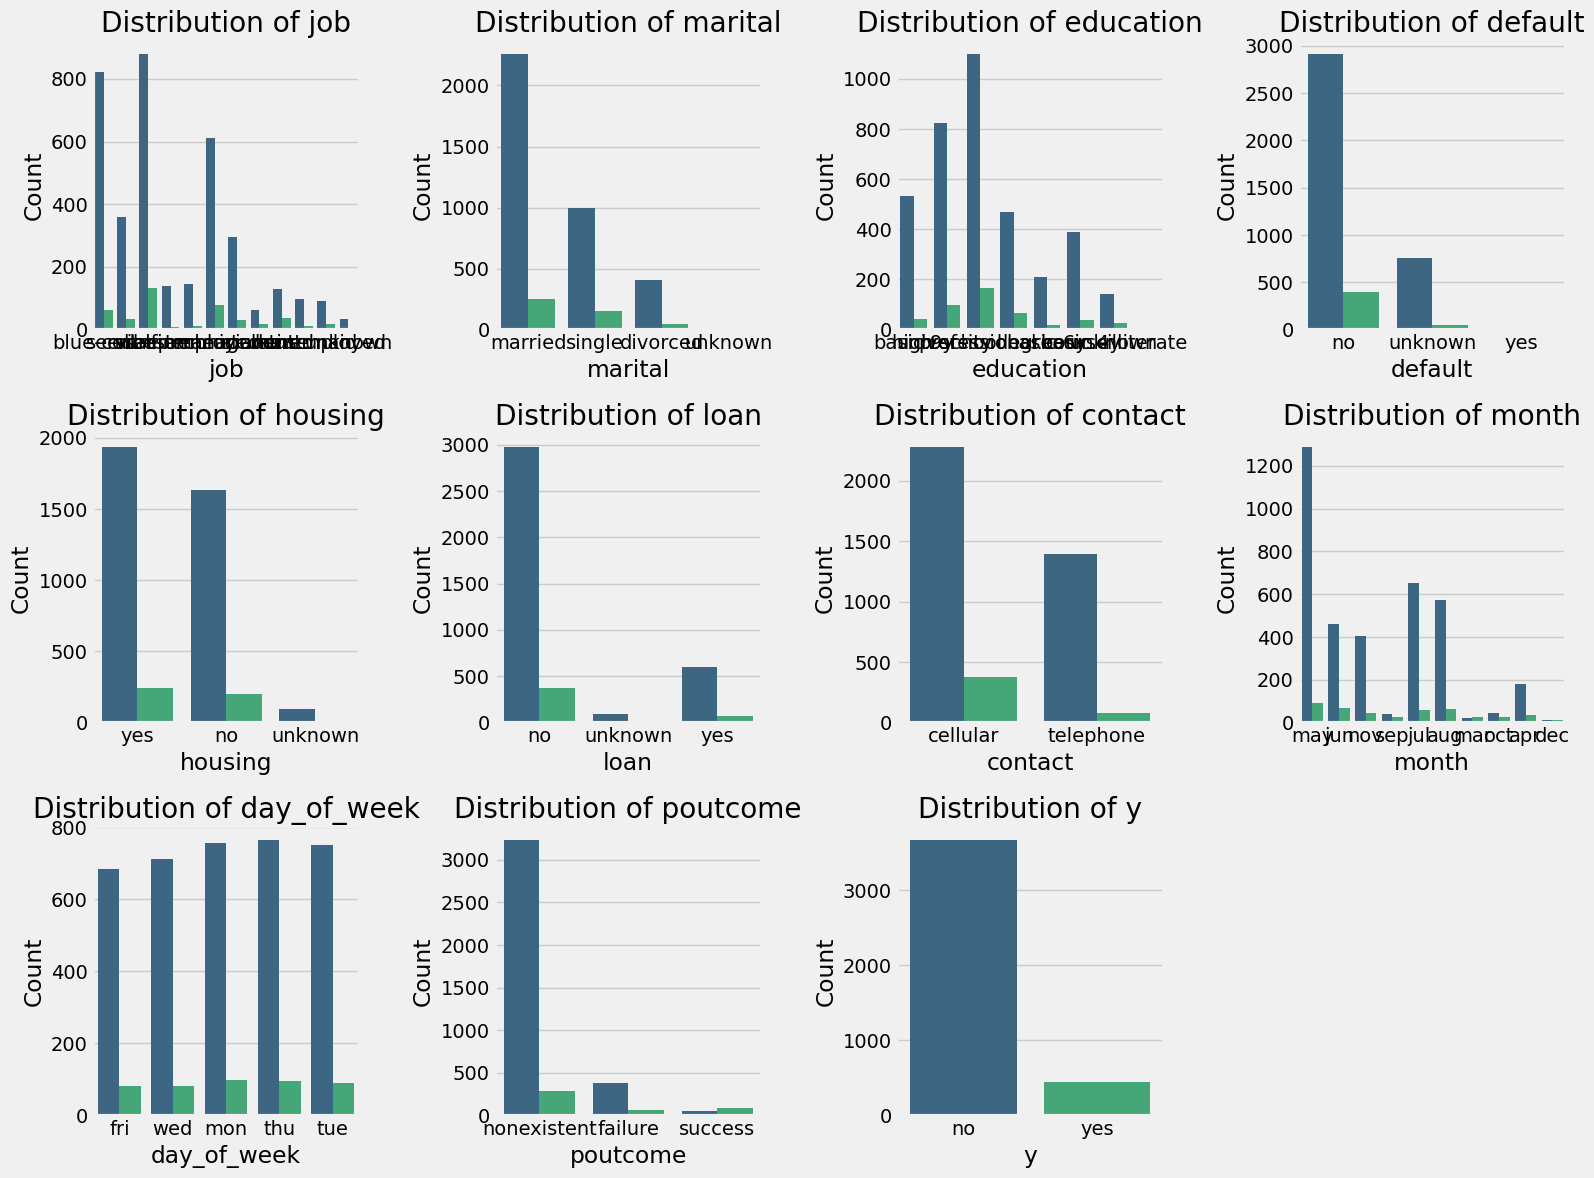

In [18]:
plt.figure(figsize=(16, 12))
rows = 3
cols = 4

for i, feature in enumerate(categorical_features):
    plt.subplot(rows, cols, i + 1)
    sns.countplot(x=feature, data=data, palette='viridis', hue='y', legend=False)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

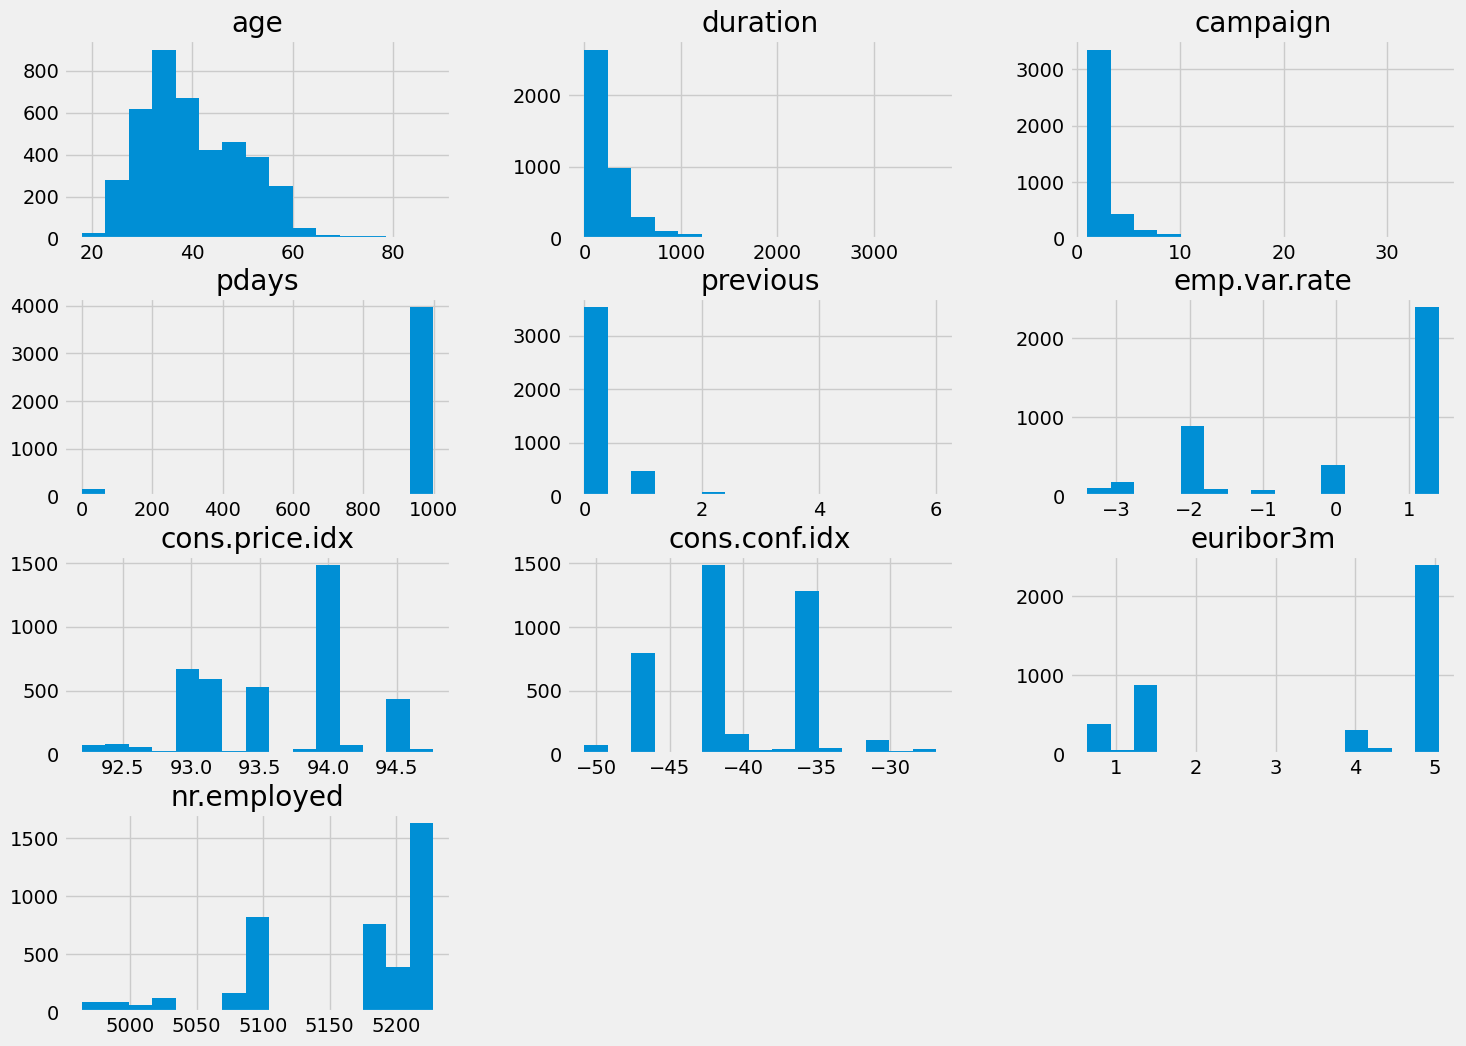

In [19]:
data.hist(bins=15, figsize=(16,12))
plt.show()

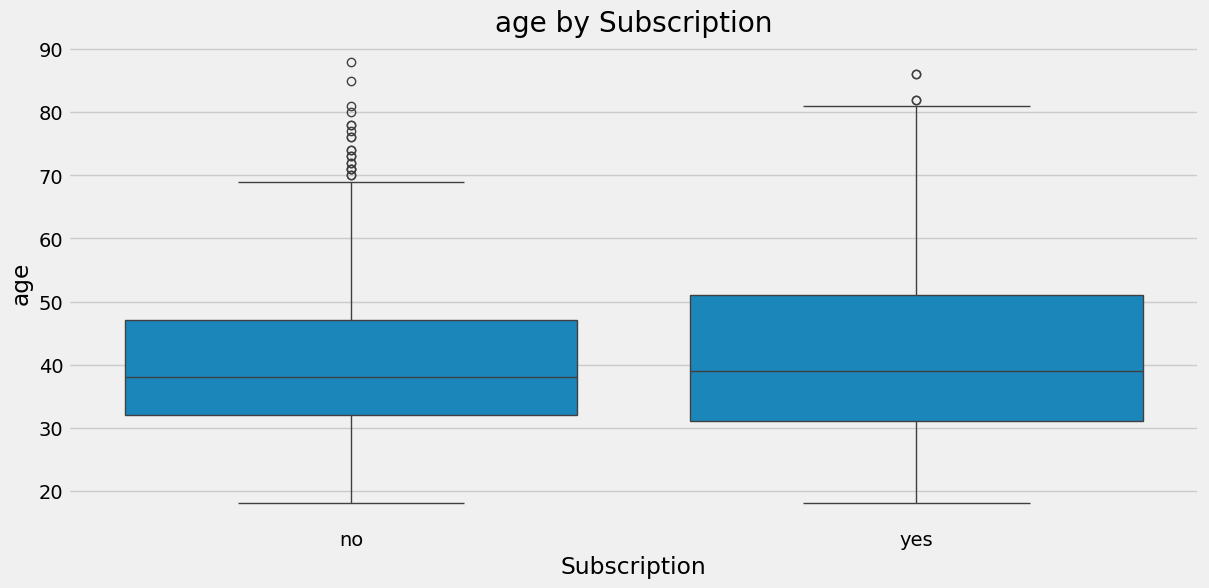

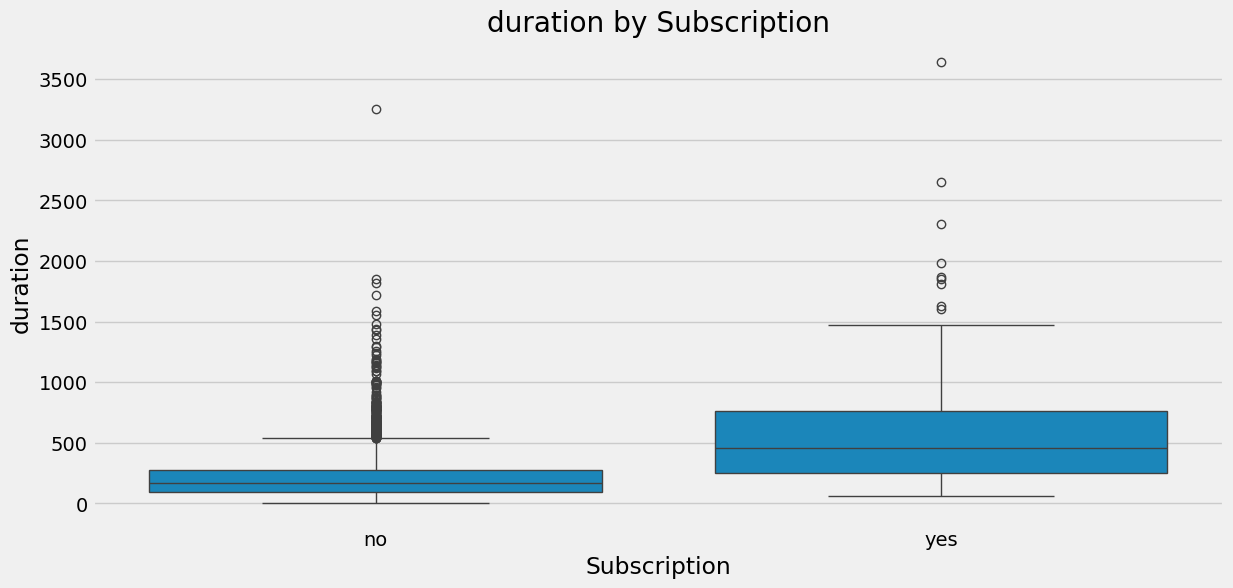

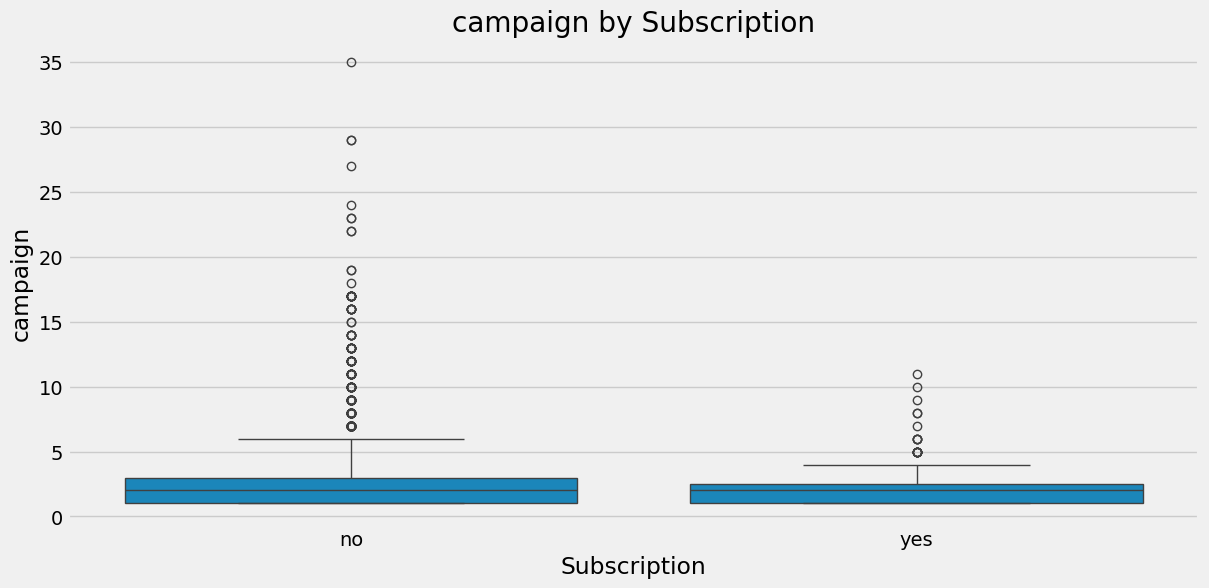

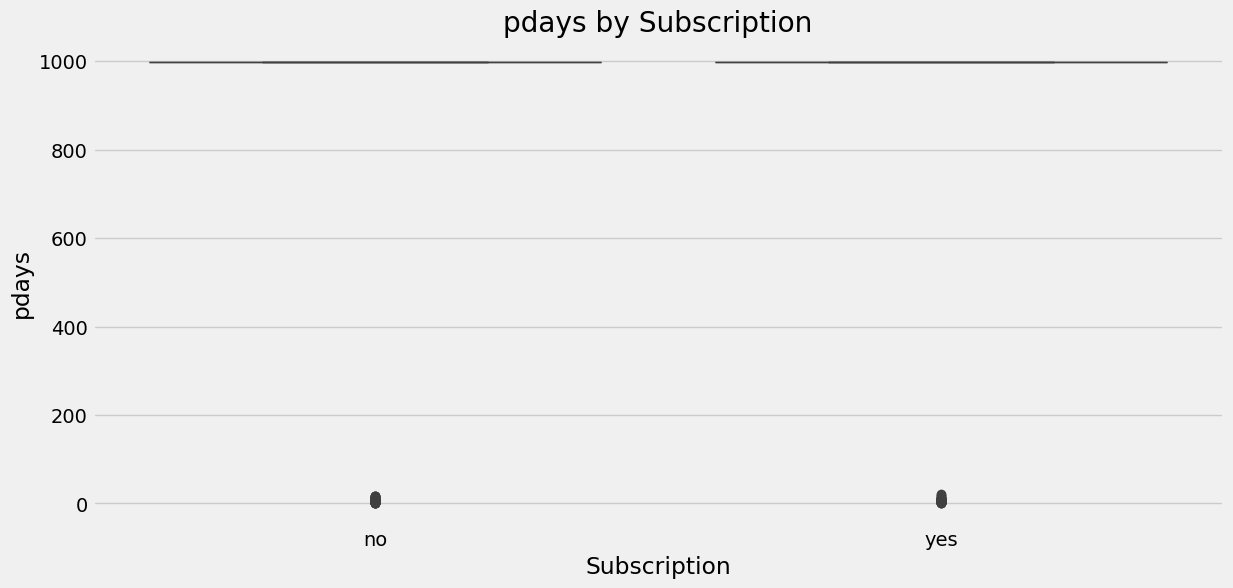

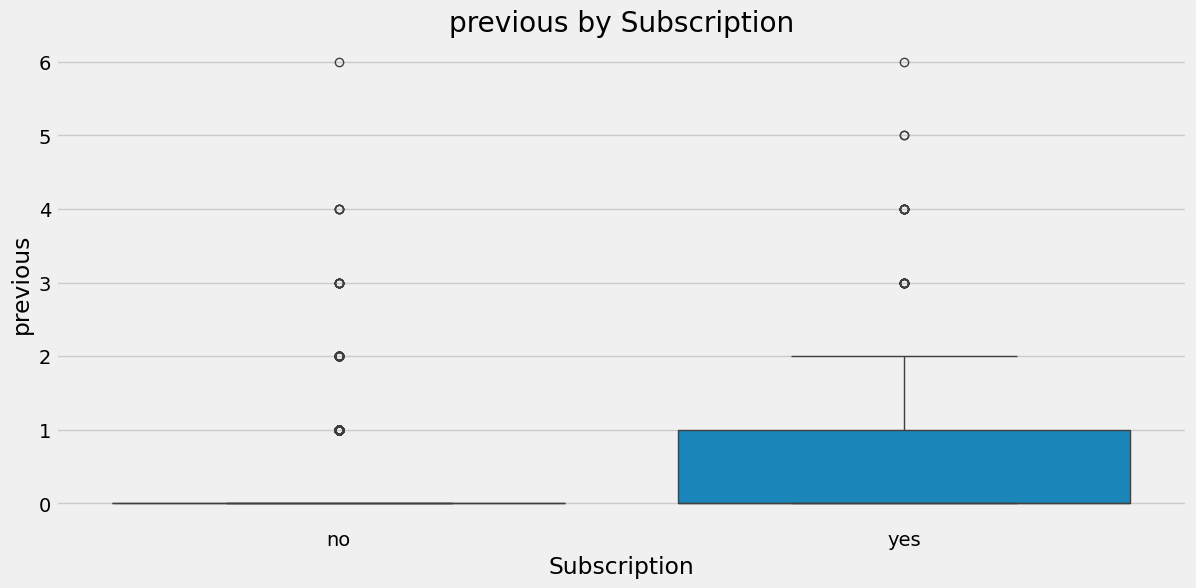

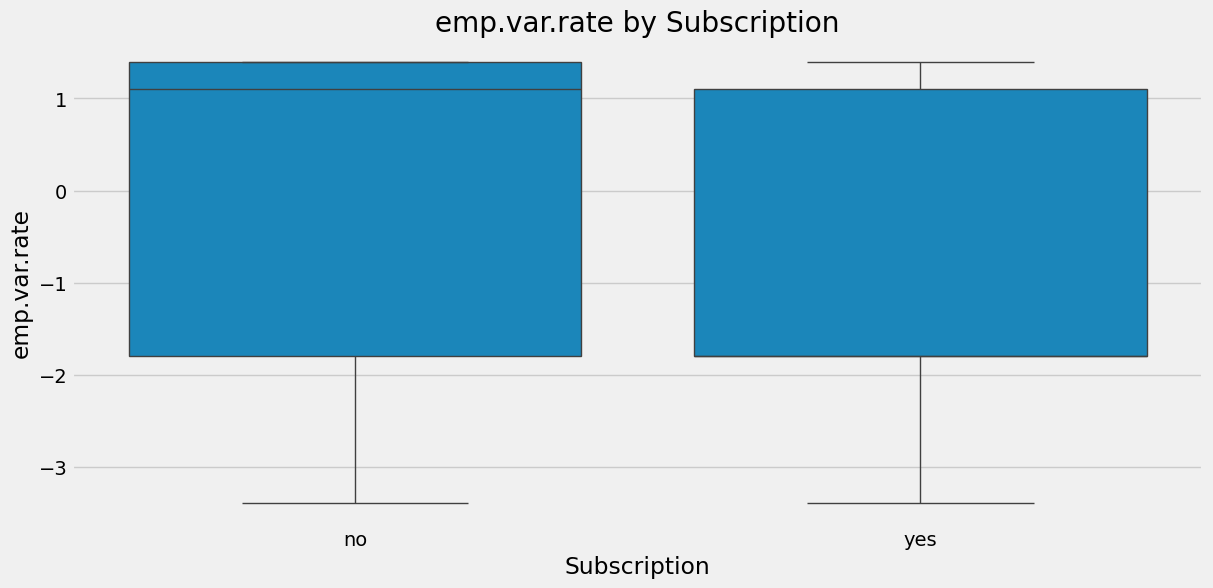

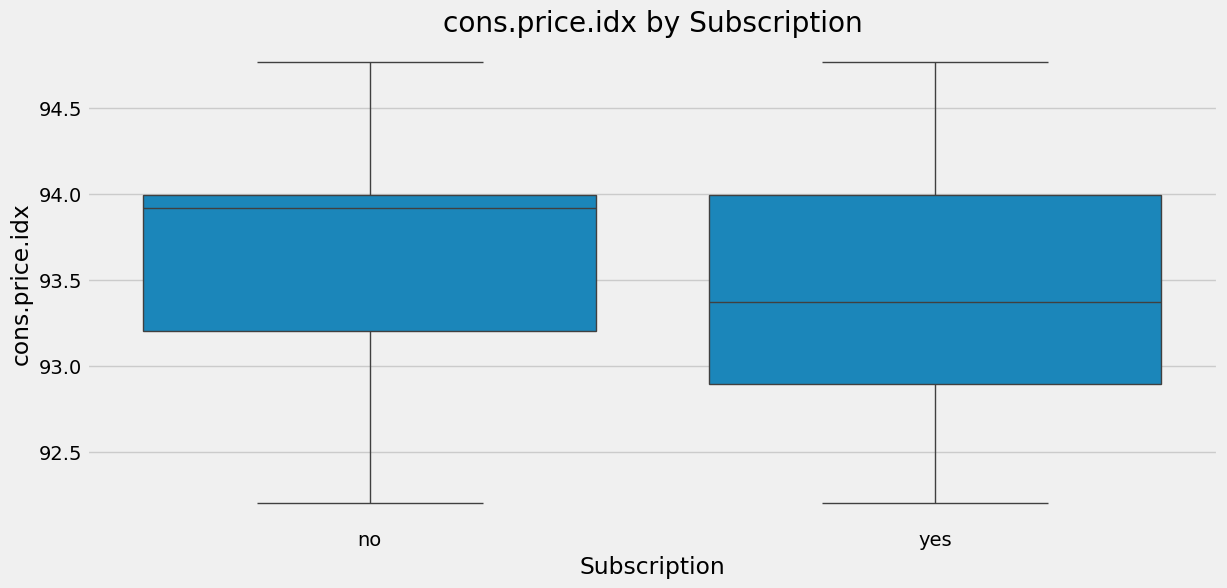

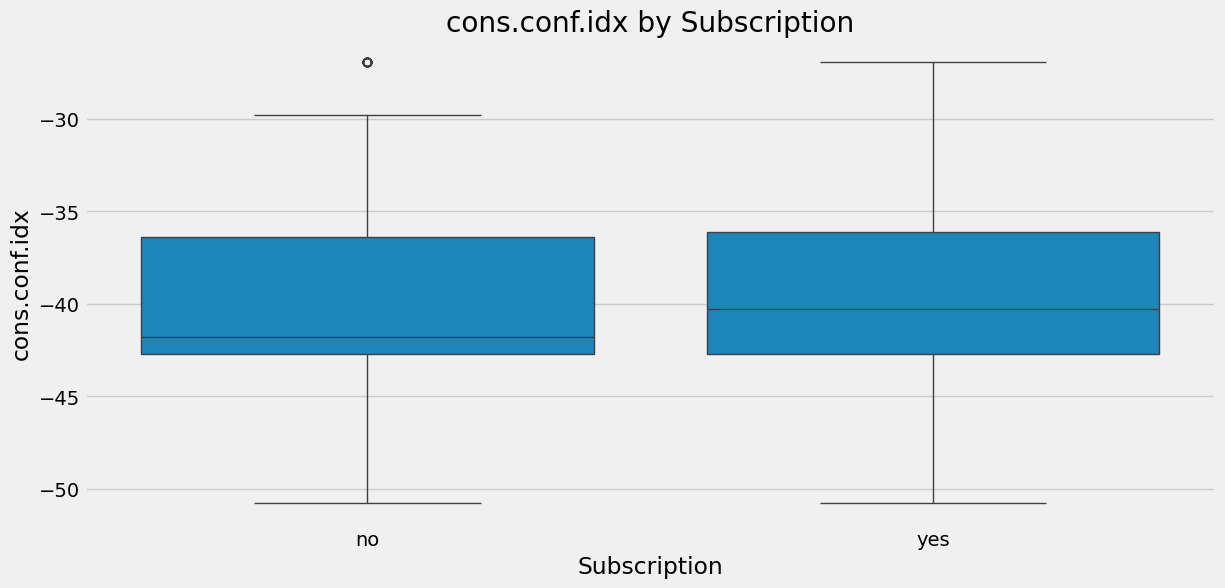

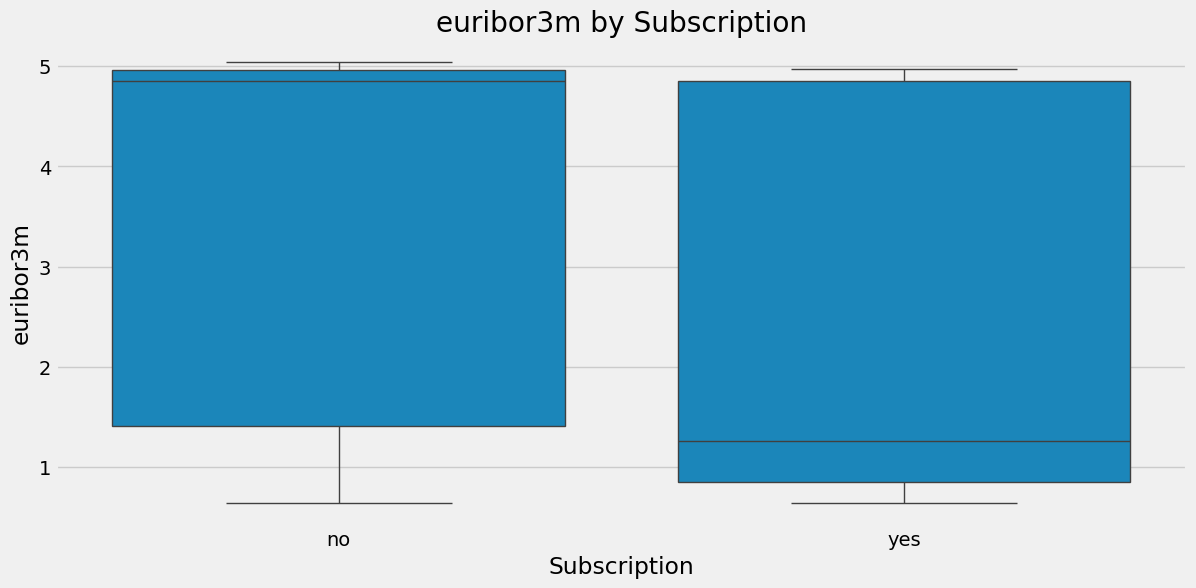

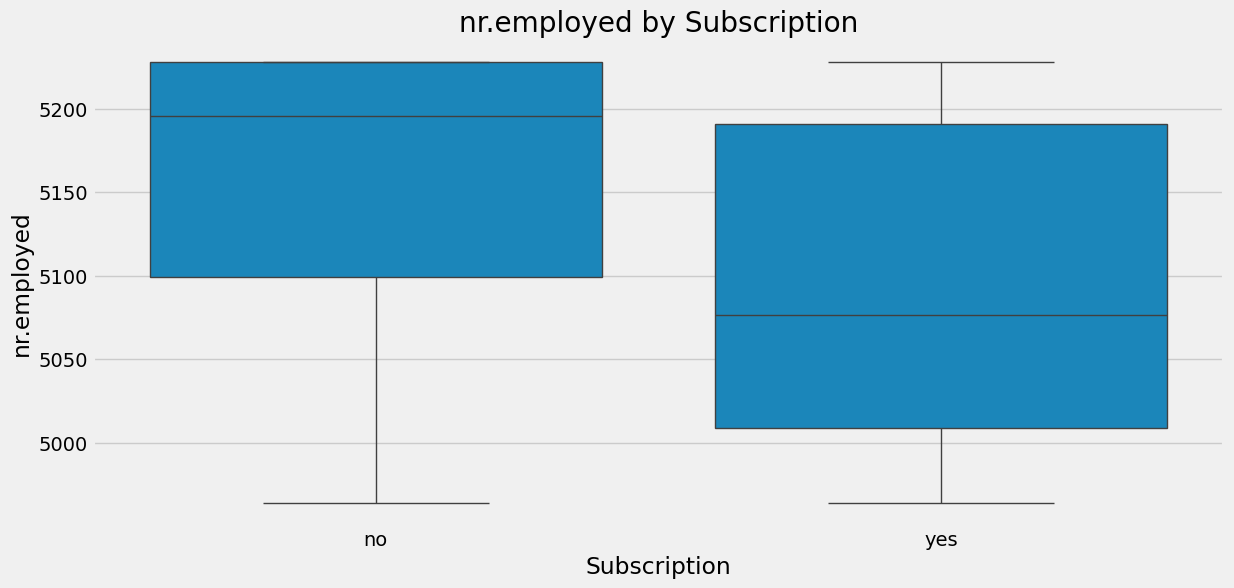

In [20]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in numerical_cols:
    plt.figure(figsize=(13, 6))
    sns.boxplot(x='y', y=col, data=data)
    plt.title(f'{col} by Subscription')
    plt.xlabel('Subscription')
    plt.ylabel(col)
    plt.show()

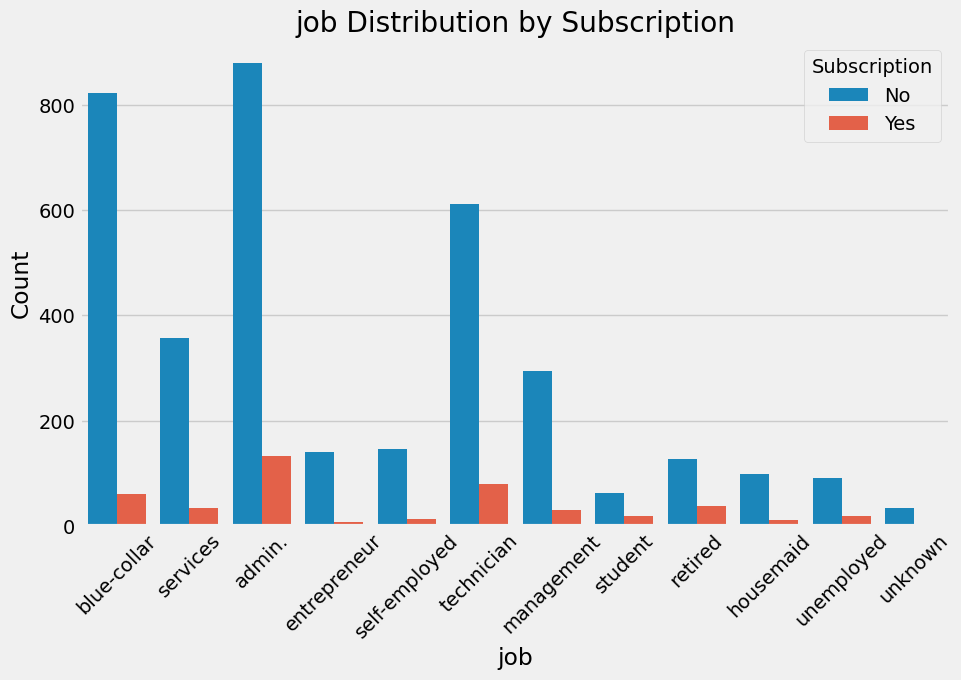

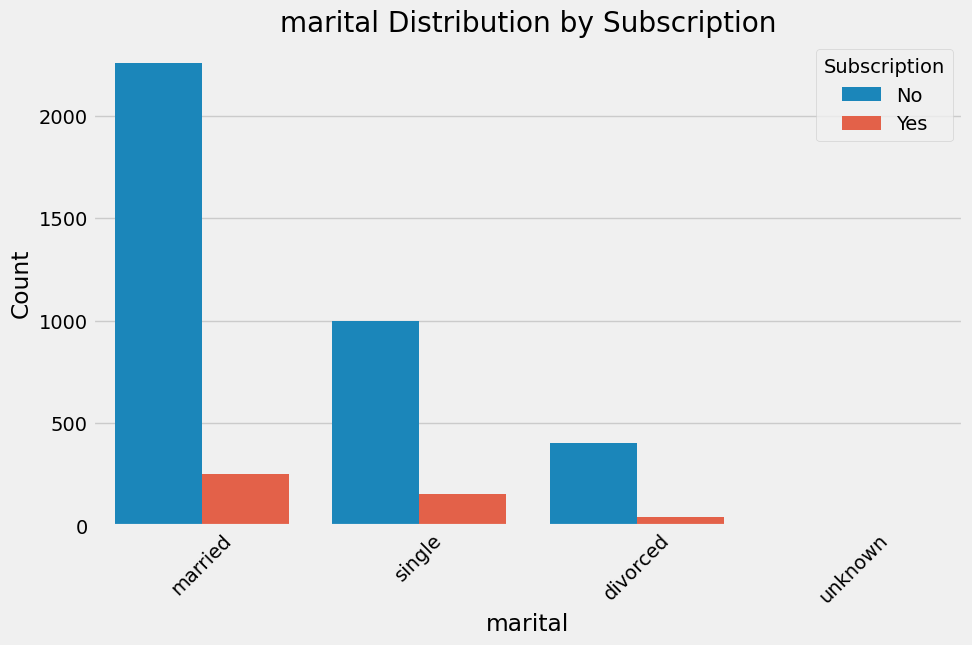

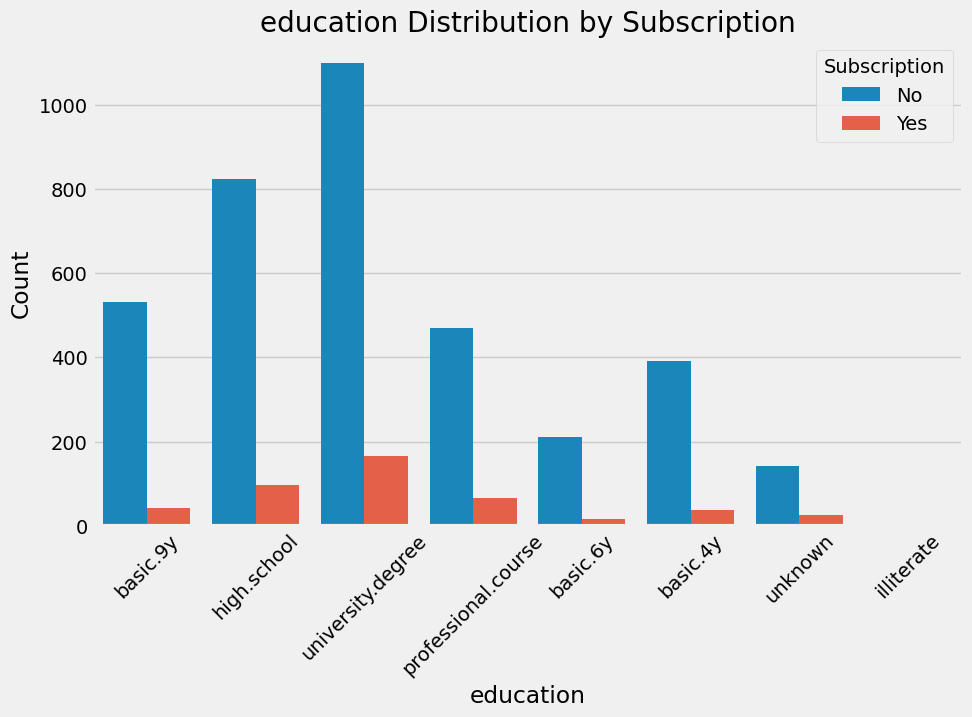

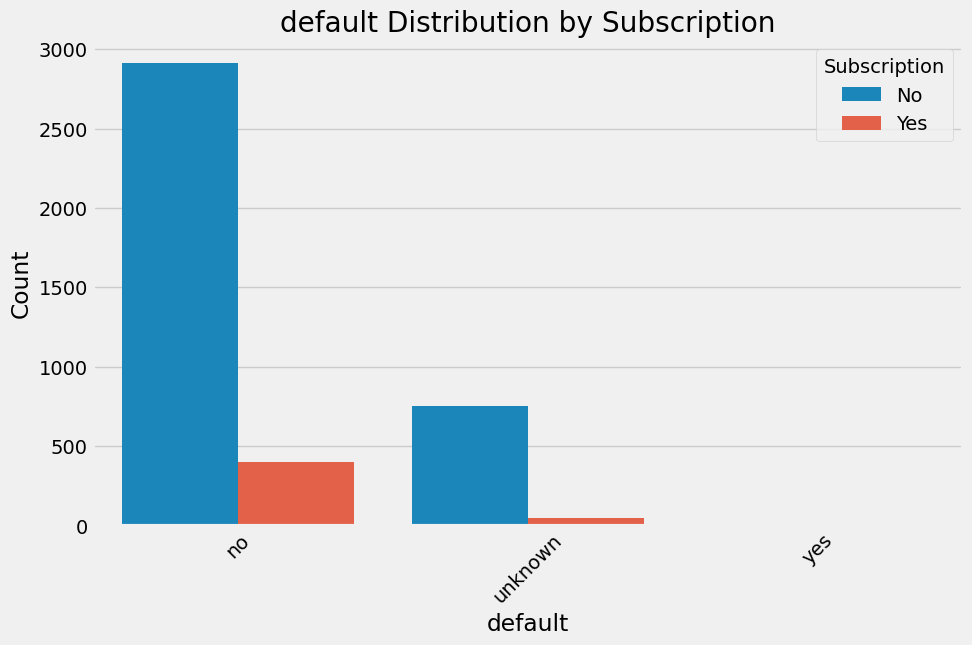

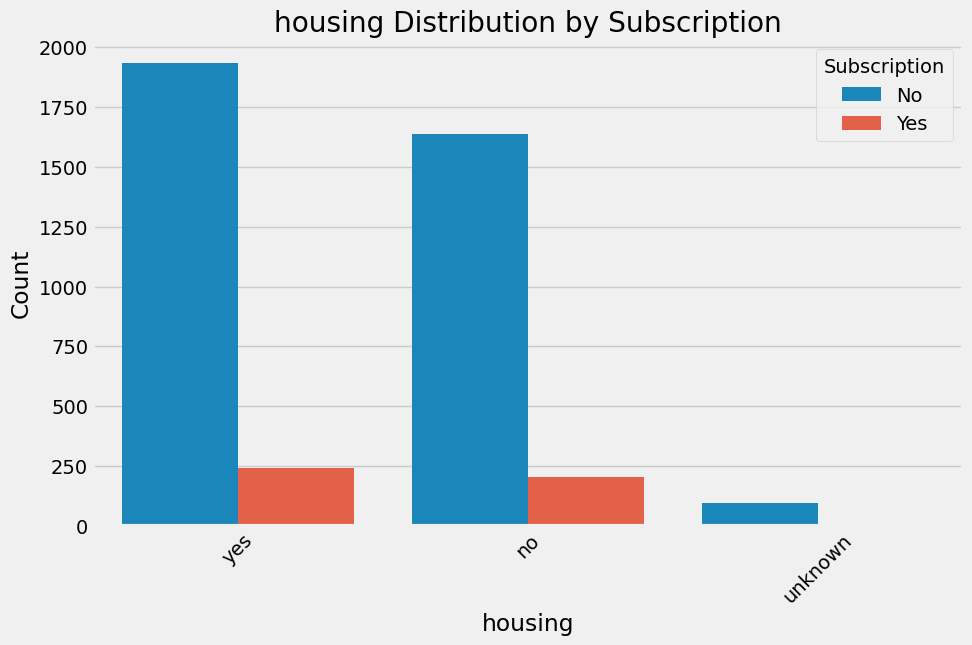

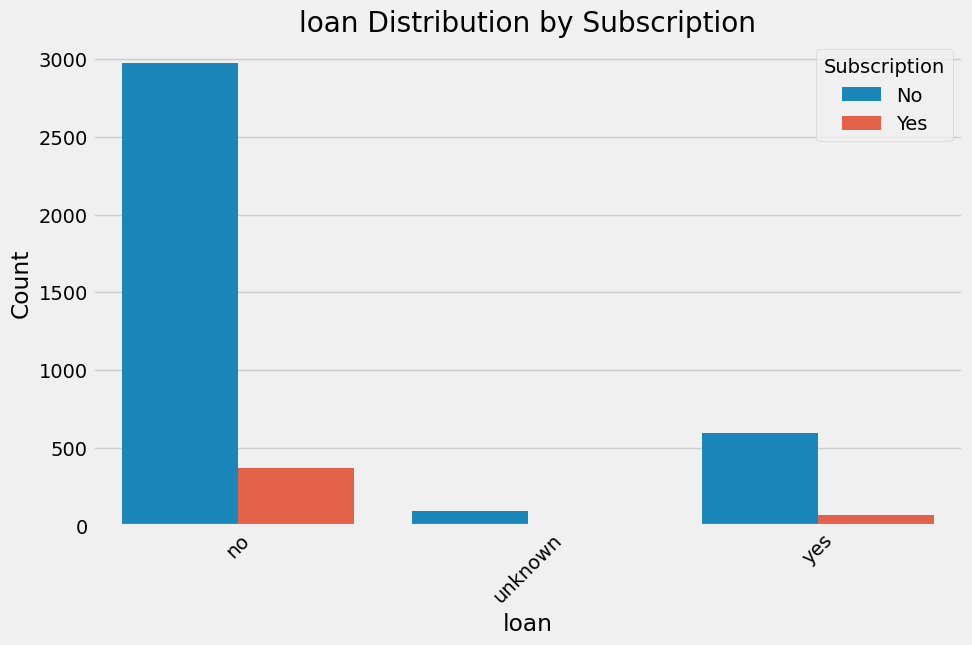

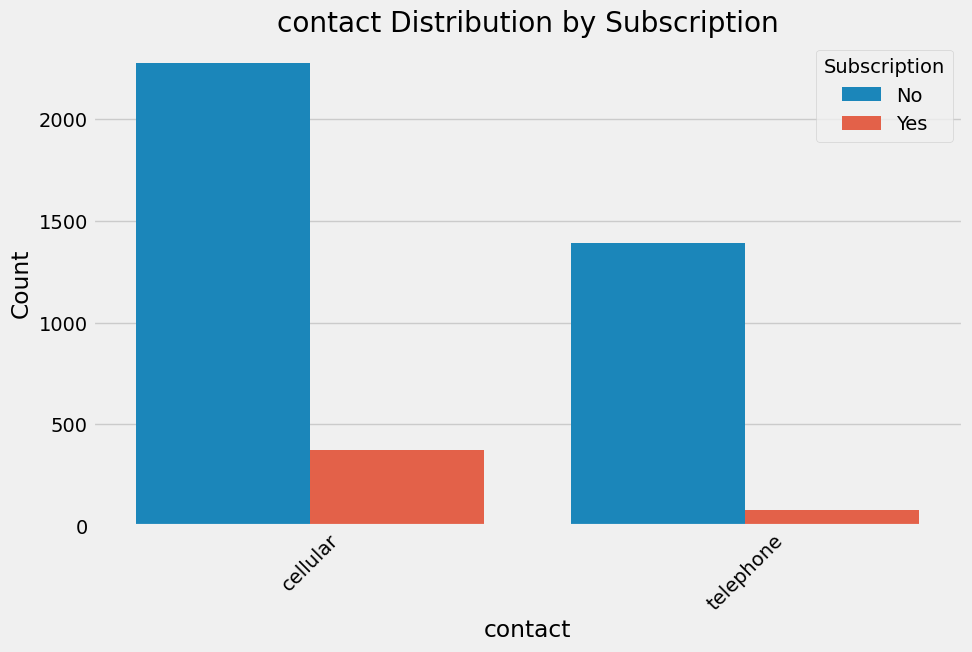

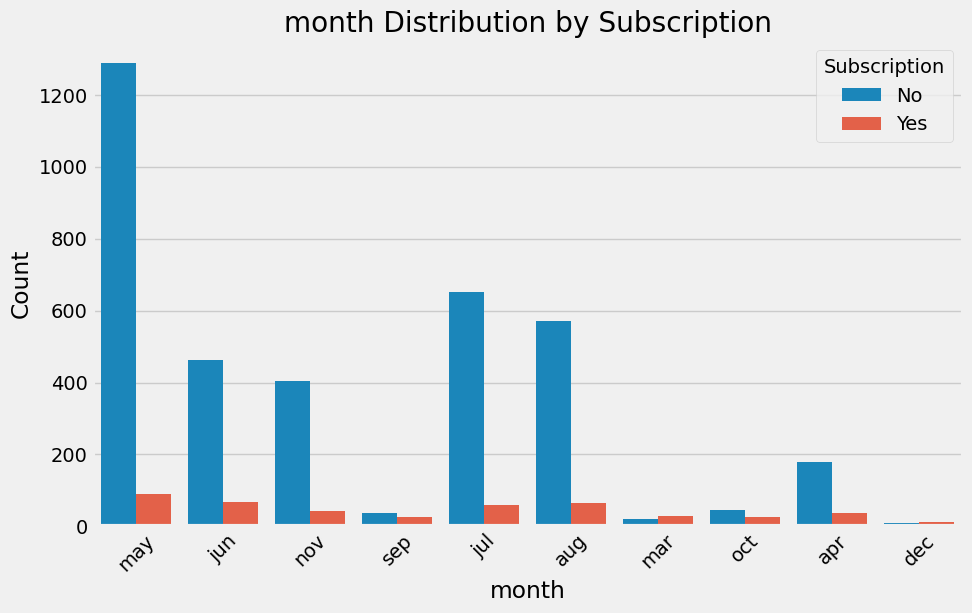

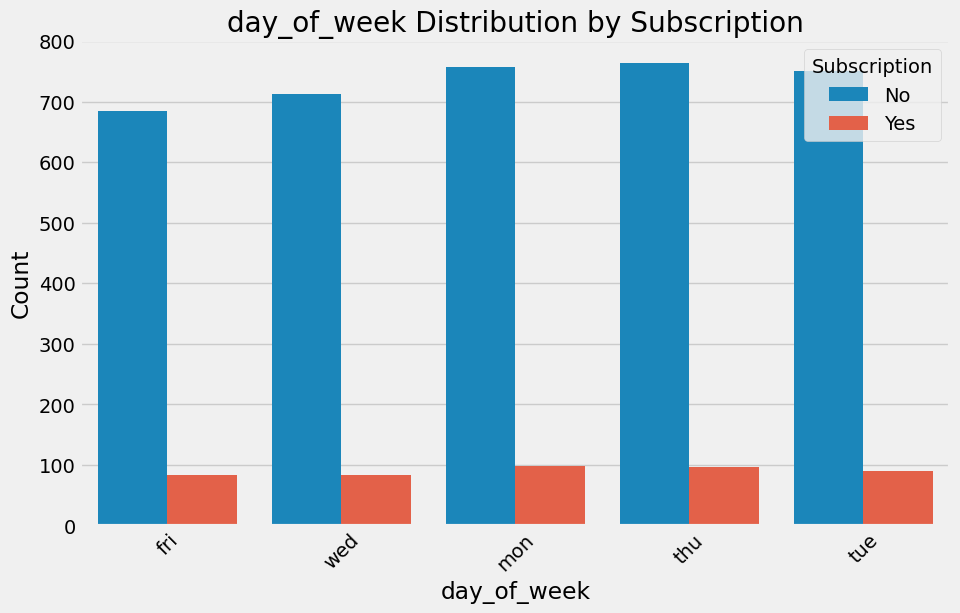

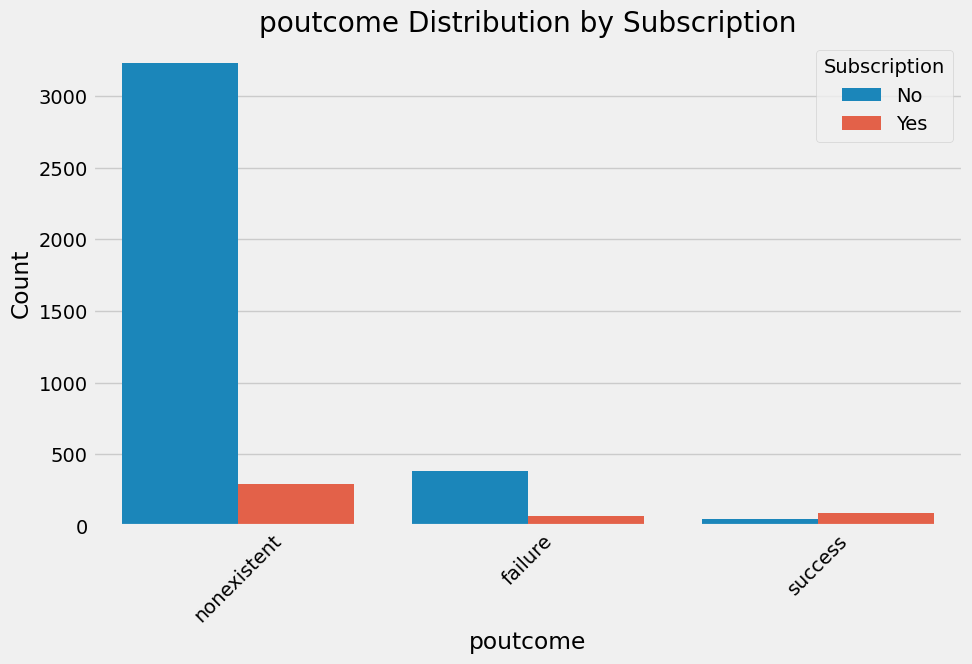

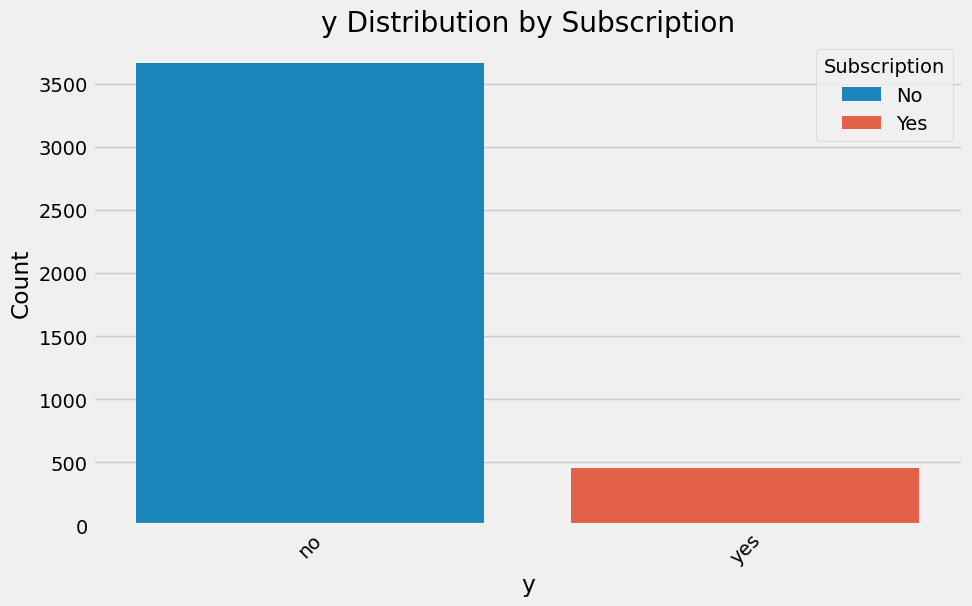

In [21]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='y', data=data)
    plt.title(f'{col} Distribution by Subscription')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Subscription', labels=['No', 'Yes'], loc='upper right')
    plt.show()

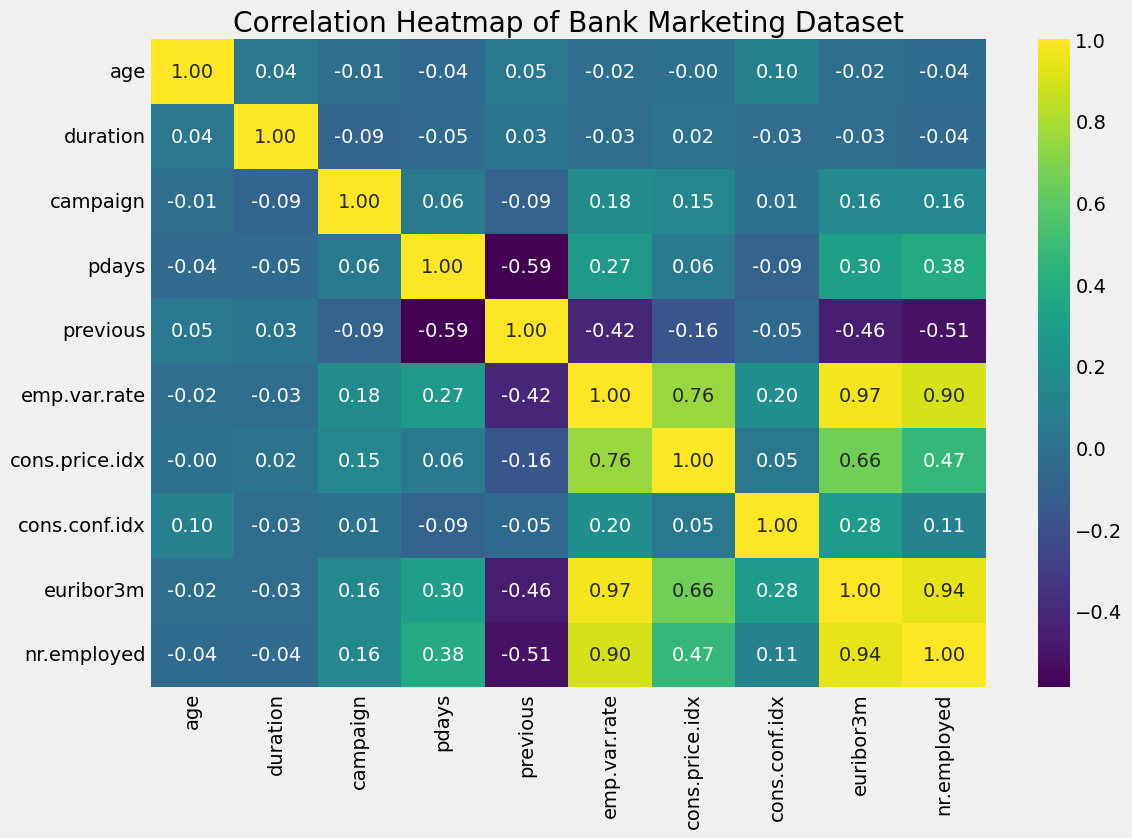

In [22]:
numeric_data = data.select_dtypes(include=[np.number])

corr_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Heatmap of Bank Marketing Dataset")
plt.show()

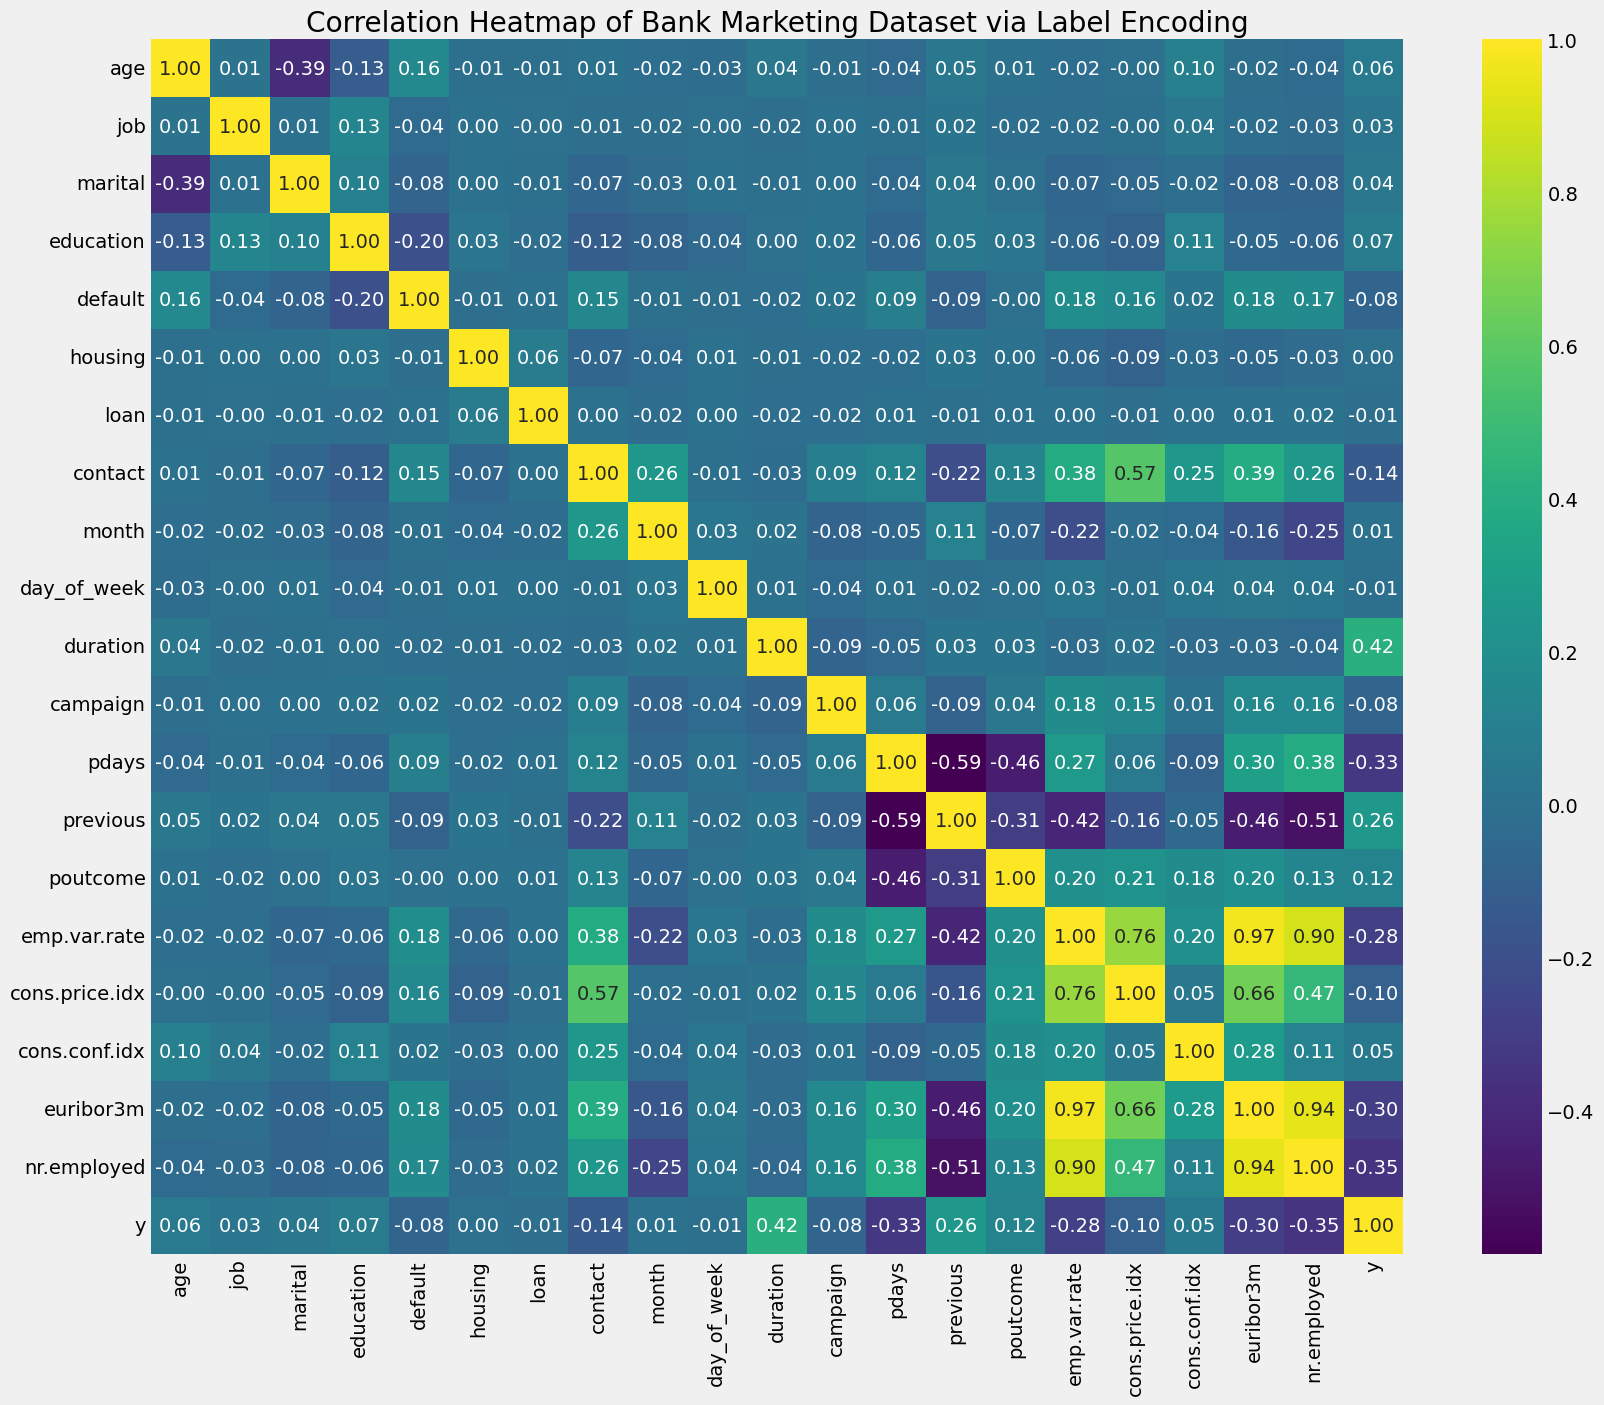

In [23]:
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

plt.figure(figsize=(18, 15))
sns.heatmap(data.corr(), annot=True, cmap= 'viridis', fmt=".2f")
plt.title('Correlation Heatmap of Bank Marketing Dataset via Label Encoding')
plt.show()

### Feature Engineering

In [24]:
data = data.drop('duration', axis=1)

In [25]:
data['previous_campaign_success_rate'] = data['previous'] / (data['pdays'] + 1) 
data['pdays_group'] = pd.cut(data['pdays'], bins=[-1, 0, 30, 90, 180, 999], labels=[0, 1, 2, 3, 4])
data['age_education_level'] = data['age'] * data['education']
print(data.head())

   age  job  marital  education  default  housing  loan  contact  month  \
0   30    1        1          2        0        2     0        0      6   
1   39    7        2          3        0        0     0        1      6   
2   25    7        1          3        0        2     0        1      4   
3   38    7        1          2        0        1     1        1      4   
4   47    0        1          6        0        2     0        0      7   

   day_of_week  ...  poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  \
0            0  ...         1          -1.8          92.893          -46.2   
1            0  ...         1           1.1          93.994          -36.4   
2            4  ...         1           1.4          94.465          -41.8   
3            0  ...         1           1.4          94.465          -41.8   
4            1  ...         1          -0.1          93.200          -42.0   

   euribor3m  nr.employed  y  previous_campaign_success_rate  pdays_group  \
0  

In [26]:
categorical_columns = data.select_dtypes(include=['object']).columns

label_encoders = {}

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


In [27]:
data = pd.read_csv("bank-additional.csv",sep = ';')

print("Original class distribution:\n", data['y'].value_counts())

minority_class = data[data['y'] == 'yes']
majority_class = data[data['y'] == 'no']

minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=123)

balanced_data = pd.concat([majority_class, minority_upsampled])

print("New class distribution after over-sampling:\n", balanced_data['y'].value_counts())

Original class distribution:
 y
no     3668
yes     451
Name: count, dtype: int64
New class distribution after over-sampling:
 y
no     3668
yes    3668
Name: count, dtype: int64


In [28]:
X = balanced_data.drop('y', axis=1)
y = balanced_data['y']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print(X_train_scaled.head())

        age  duration  campaign     pdays  previous  emp.var.rate  \
0 -0.594509 -0.606662 -0.143739  0.373617 -0.452134     -0.720373   
1 -1.110636 -0.202604 -0.143739  0.373617 -0.452134     -1.707175   
2 -0.680530 -0.164639 -0.608539  0.373617 -0.452134      1.079090   
3  1.297956  1.489558  0.321060  0.373617 -0.452134      1.079090   
4  0.953871 -0.639203  1.715458  0.373617 -0.452134      1.079090   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  ...  month_may  \
0        0.804434       0.341726  -1.098599    -1.603338  ...  -0.616747   
1       -1.689573       2.507680  -1.185486    -1.313427  ...  -0.616747   
2       -0.106597       0.759717   1.038299     1.043912  ...  -0.616747   
3        1.488880      -0.323259   0.986694     1.043912  ...  -0.616747   
4        0.634104      -0.494256   1.041459     1.043912  ...  -0.616747   

   month_nov  month_oct  month_sep  day_of_week_mon  day_of_week_thu  \
0  -0.338896  -0.197618  -0.183911        -0.522427     

In [29]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8859609268514311
              precision    recall  f1-score   support

          no       0.91      0.86      0.88      1105
         yes       0.87      0.91      0.89      1096

    accuracy                           0.89      2201
   macro avg       0.89      0.89      0.89      2201
weighted avg       0.89      0.89      0.89      2201



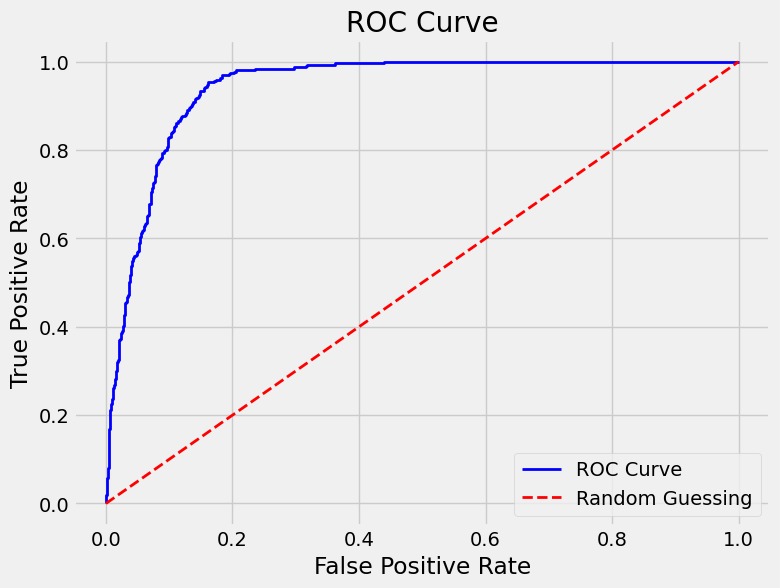

AUC Score: 0.9430962446741751


In [30]:
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

y_test_binary = (y_test == 'yes').astype(int)

fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc_score = roc_auc_score(y_test_binary, y_pred_proba)
print("AUC Score:", auc_score)


In [31]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.967741935483871
              precision    recall  f1-score   support

          no       1.00      0.94      0.97      1105
         yes       0.94      1.00      0.97      1096

    accuracy                           0.97      2201
   macro avg       0.97      0.97      0.97      2201
weighted avg       0.97      0.97      0.97      2201



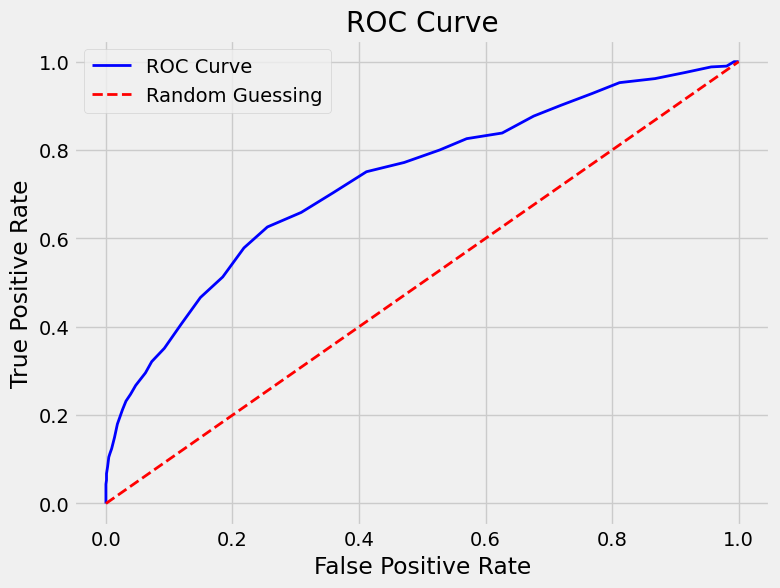

AUC Score: 0.7321337153614954


In [32]:
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

y_test_binary = (y_test == 'yes').astype(int)

fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc_score = roc_auc_score(y_test_binary, y_pred_proba)
print("AUC Score:", auc_score)


### Model Selection

In [33]:
model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9618355293048614
              precision    recall  f1-score   support

          no       1.00      0.93      0.96      1105
         yes       0.93      1.00      0.96      1096

    accuracy                           0.96      2201
   macro avg       0.96      0.96      0.96      2201
weighted avg       0.96      0.96      0.96      2201



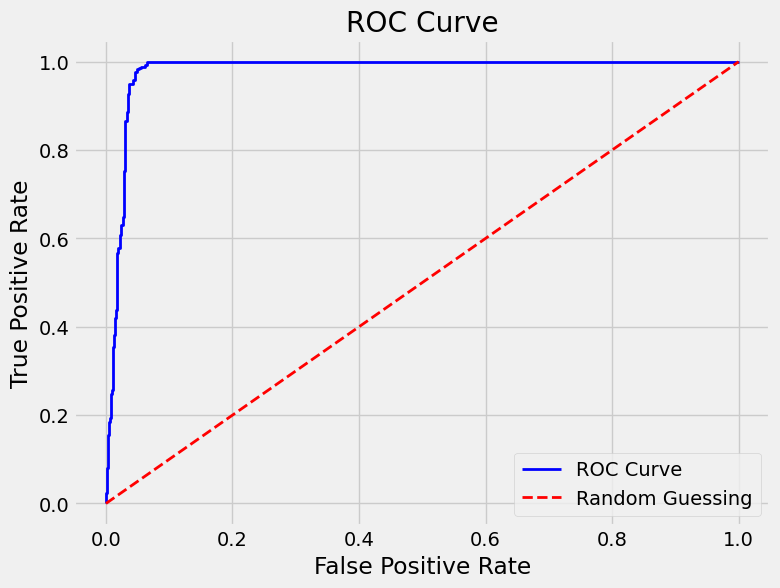

AUC Score: 0.9806082174587971


In [34]:
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

y_test_binary = (y_test == 'yes').astype(int)

fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc_score = roc_auc_score(y_test_binary, y_pred_proba)
print("AUC Score:", auc_score)


### Creating Pipeline

In [35]:
class CustomLabelEncoder(BaseEstimator, TransformerMixin):
    def init(self, columns):
        self.columns = columns
        self.encoders = {}

    def fit(self, X, y=None):
        for col in self.columns:
            encoder = LabelEncoder()
            encoder.fit(X[col])
            self.encoders[col] = encoder
        return self

    def transform(self, X):
        X = X.copy()
        for col, encoder in self.encoders.items():
            X[col] = encoder.transform(X[col])
        return X

class FeaturesAdder(BaseEstimator, TransformerMixin):
    def init(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_new = X.copy()
        X_new['previous_campaign_success_rate'] = X_new['previous'] / (X_new['pdays'] + 1)
        X_new['pdays_group'] = pd.cut(X_new['pdays'], bins=[-1, 0, 30, 90, 180, 999], labels=[0, 1, 2, 3, 4])
        X_new['age_education_level'] = X_new['age'] * X_new['education'].astype('category').cat.codes
        return X_new

### Hyperparameter Tuning

In [36]:
X = data.drop(columns=['y'], axis=1)
y = data['y']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(random_state=42, class_weight='balanced')

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],

}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 0.8980582524271845
              precision    recall  f1-score   support

          no       0.93      0.96      0.94       732
         yes       0.56      0.39      0.46        92

    accuracy                           0.90       824
   macro avg       0.74      0.68      0.70       824
weighted avg       0.89      0.90      0.89       824



### Evaluation

In [37]:
data = pd.read_csv("bank-additional.csv",sep = ';')

In [38]:
data = data.drop('duration', axis=1)

In [39]:
print("Original class distribution:\n", data['y'].value_counts())

minority_class = data[data['y'] == 'yes']
majority_class = data[data['y'] == 'no']

minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=123)

balanced_data = pd.concat([majority_class, minority_upsampled])

print("New class distribution after over-sampling:\n", balanced_data['y'].value_counts())

Original class distribution:
 y
no     3668
yes     451
Name: count, dtype: int64
New class distribution after over-sampling:
 y
no     3668
yes    3668
Name: count, dtype: int64


In [40]:
class CustomLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.label_encoders = {col: LabelEncoder() for col in self.columns}

    def fit(self, X, y=None):
        for col in self.columns:
            self.label_encoders[col].fit(X[col])
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in self.columns:
            X_copy[col] = self.label_encoders[col].transform(X_copy[col])
        return X_copy

class CustomFeaturesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, feature1_index, feature2_index):
        self.feature1_index = feature1_index
        self.feature2_index = feature2_index

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = pd.DataFrame(X)  
        X_copy['new_feature'] = X_copy.iloc[:, self.feature1_index] * X_copy.iloc[:, self.feature2_index]
        return X_copy

data = pd.read_csv("bank-additional.csv",sep = ';')

target_column = 'y' 
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
                       'day_of_week', 'poutcome']
numerical_columns = ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
                     'euribor3m', 'nr.employed']

X = data.drop(target_column, axis=1)
y = data[target_column]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('num', StandardScaler(), numerical_columns)
    ],
    remainder='passthrough'
)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

pipeline_rf = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
}

grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train_transformed, y_train)

print("Best hyperparameters for Random Forest:\n", grid_search_rf.best_params_)

best_rf_model = grid_search_rf.best_estimator_
predictions_rf = best_rf_model.predict(X_test_transformed)
print("Accuracy:", accuracy_score(y_test, predictions_rf))
print(classification_report(y_test, predictions_rf))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best hyperparameters for Random Forest:
 {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Accuracy: 0.8980582524271845
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       732
           1       0.62      0.23      0.33        92

    accuracy                           0.90       824
   macro avg       0.76      0.61      0.64       824
weighted avg       0.88      0.90      0.88       824



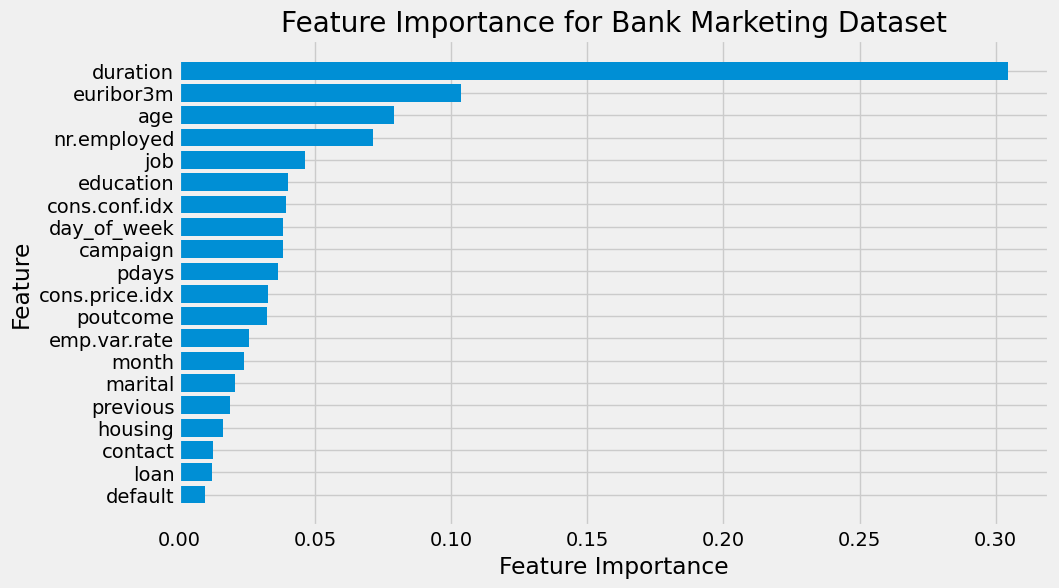

In [41]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

X = data.drop('y', axis=1)
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Bank Marketing Dataset')
plt.gca().invert_yaxis()
plt.show()

### Saving the model using ``pickle``

In [42]:
import pickle

filename = 'bank_marketing_prediction.sav'
pickle.dump(best_rf_model, open(filename,'wb')) 

In [43]:
import pkg_resources
import types

def get_imports():
    imported_packages = set()
    poorly_named_packages = {
        "PIL": "Pillow",
        "sklearn": "scikit-learn"
    }

    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            root_package = val.__name__.split(".")[0]
        elif isinstance(val, type):
            root_package = val.__module__.split(".")[0]
        else:
            continue

        if root_package in poorly_named_packages:
            root_package = poorly_named_packages[root_package]
        
        imported_packages.add(root_package)

    return imported_packages

def get_package_versions(imported_packages):
    requirements = []
    for package in pkg_resources.working_set:
        if package.project_name in imported_packages and package.project_name != "pip":
            requirements.append((package.project_name, package.version))
    return requirements

def main():
    imported_packages = get_imports()
    package_versions = get_package_versions(imported_packages)

    for package_name, version in package_versions:
        print(f"{package_name}=={version}")

if __name__ == "__main__":
    main()

matplotlib==3.8.4
pandas==2.2.2
numpy==1.26.4
scikit-learn==1.4.2
seaborn==0.13.2
